In [31]:
import numpy as np
import pandas as pd
import matplotlib as plt
from fbprophet import Prophet
from datetime import datetime
from datetime import timedelta
% matplotlib inline

In [2]:
dataset = pd.read_csv('sales_train.csv')

In [3]:
dataset.head(n=3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [4]:
dataset.iloc[2,0]

'05.01.2013'

In [5]:
dataset['date'] = dataset['date'].apply(lambda x: x[-4:] + '-' + x[3:5] + '-' + x[0:2])

In [6]:
dataset.head(n=3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [7]:
#Find the item with the most data to analyse first
X = dataset.loc[dataset['item_id'] == dataset.mode()['item_id'][0]]
X = X.loc[X['shop_id'] == X.mode()['shop_id'][0]]

In [8]:
X.shape

(867, 6)

In [13]:
X.head(n=3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
359513,2013-04-29,3,28,20949,5.000000,2.0
359534,2013-04-30,3,28,20949,5.000000,5.0
450067,2013-05-01,4,28,20949,4.974359,39.0


In [12]:
X.tail(n=3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2928472,2015-10-29,33,28,20949,5.0,12.0
2928473,2015-10-30,33,28,20949,5.0,4.0
2928474,2015-10-31,33,28,20949,5.0,15.0


In [11]:
X = X.sort_values(by=['date'])

In [12]:
len(X.iloc[:,5])

867

In [30]:
datetime.strptime('2015-10-29','%Y-%m-%d').year

2015

In [35]:
dates=X['date'].apply(lambda u: datetime.strptime(u, '%Y-%m-%d'))
print(dates.head())

359513   2013-04-29
359534   2013-04-30
450067   2013-05-01
450066   2013-05-02
450065   2013-05-03
Name: date, dtype: datetime64[ns]


In [45]:
(dates.values[1:3]-dates.values[:2]).apply(lambda x: x.days)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

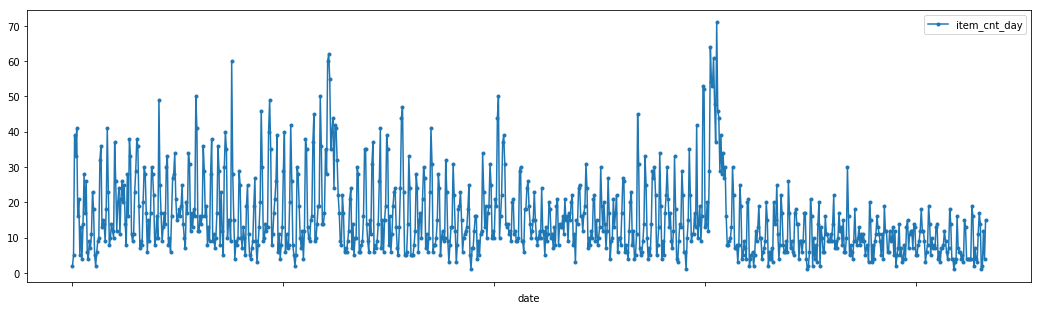

In [46]:
X.plot(x='date', y='item_cnt_day', style='.-', figsize=(18,5))

In [47]:
item_cnt_ts = Prophet()
item_cnt_ts.fit(X[['date', 'item_cnt_day']].rename(columns={"date": "ds", "item_cnt_day": "y"}))

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [48]:
item_future = item_cnt_ts.make_future_dataframe(periods=30, freq='D')
item_future.tail(n=5)

,ds
892,2015-11-26
893,2015-11-27
894,2015-11-28
895,2015-11-29
896,2015-11-30


In [49]:
item_forecast = item_cnt_ts.predict(item_future)

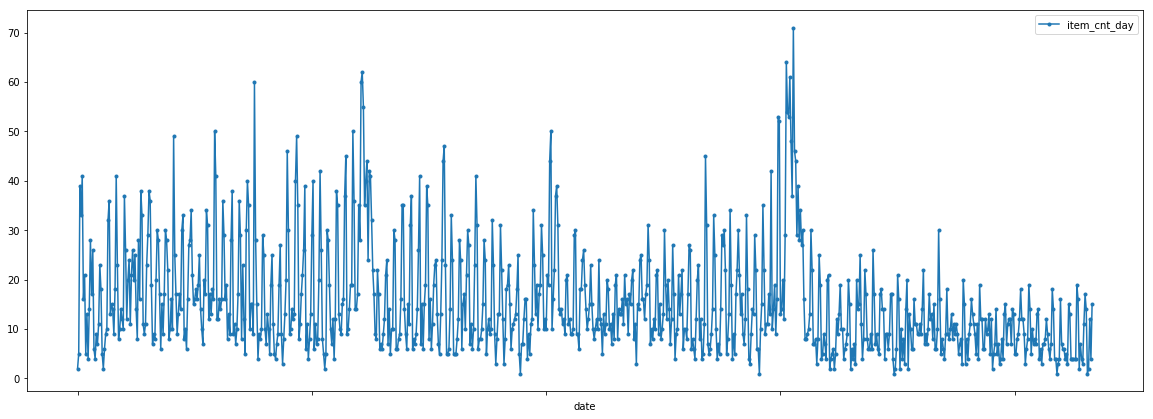

In [50]:
X.plot(x='date', y='item_cnt_day', style='.-', figsize=(20,7))

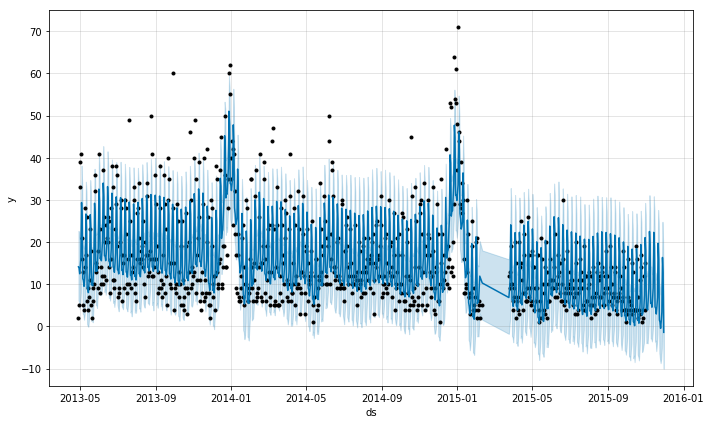

In [51]:
fig1 = item_cnt_ts.plot(item_forecast)

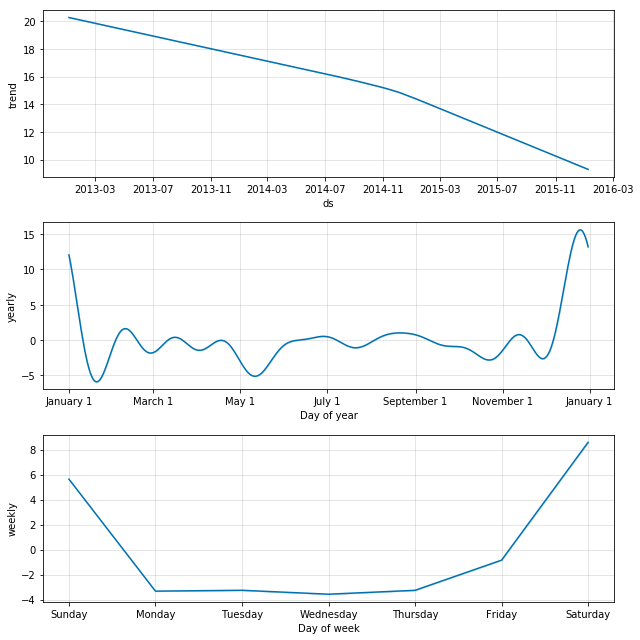

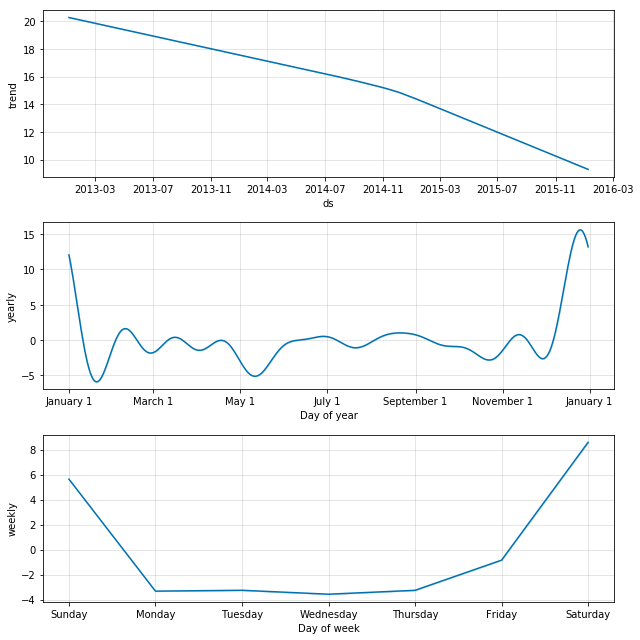

In [15]:
item_cnt_ts.plot_components(item_forecast)

In [20]:
fig2, ax1 = plt.subplots(1,1,1)
#fig2 = plt.figure()
#fig2, ax1 = plt.subplots()
item_cnt_ts.plot(item_forecast)

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [36]:
X.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
359513,2013-04-29,3,28,20949,5.000000,2.0
359534,2013-04-30,3,28,20949,5.000000,5.0
450067,2013-05-01,4,28,20949,4.974359,39.0
450066,2013-05-02,4,28,20949,4.969697,33.0
450065,2013-05-03,4,28,20949,5.000000,41.0


In [5]:
(dataset['date'].map(type) == str).all()

True